### Exercise 1
**Password models**

In the resources folder you find a (real) password set 1 . This set contains 14,344,388 different passwords.

We use this set to calculate the probability of passwords and to analyze different password policies. But before that you should get an overview about the password set.

We use this set to calculate the probability of passwords and to analyze different password policies. But before that you should get an overview about the password set.

In [30]:
library(stringr)
library(entropy)
library(dplyr)
library(tidyr)
library(ggplot2)
library(entropy)
library(rapportools)
library(lattice)
library(tidyverse)

In [3]:
pwd_full <- read.csv("rockyou.csv")

**a)**

Choose your tool to analyze the password set. We recommend python or R but you
can choose an other tool. Be aware that most CSV-Tools can not handle a huge file.

The data was prepared via _grep_ and _awk_ on command line. For the actual data analysis _R_ was used via _jupyter-notebook_.

**b)**

Describe the password set and passwords, e.g. size, distribution, password length, errors in the set. Each description should include at least the center (mean, median or mode), the dispersion (variance, range, percentile, . . . ).

The data set comprises 14,344,388 entries along with their occurrences. It is ascending ordered by the occurrence (count)

If we have a log at length of the password it can be said, that the minimal length is 0 and the maximum 285 characters. The mean is 8.75 chars. But the first quantile includes the length of 7 chars, whereas the 3rd quantile includes the 10 chars. So we can conclude that most passwords are between 7 and 10 chars and only 25% are longer. Have a look at the according box plot.

In the same manner we can do so summary on the count of passwords. If we plot the count in a histogram or we can see that there a high occurrence for the common passwords and a lot of passwords that are very seldom. Therefore the mean of the occurrence is 2.27. and after the first quantile we have an occurrence of only 1.

In [4]:
df_ry_pwd_len <- as.data.frame(str_length(pwd_full$password))
summary(df_ry_pwd_len)
summary(pwd_full$count)

 str_length(pwd_full$password)
 Min.   :  0.000              
 1st Qu.:  7.000              
 Median :  8.000              
 Mean   :  8.754              
 3rd Qu.: 10.000              
 Max.   :285.000              
 NA's   :1                    

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     1.00      1.00      1.00      2.27      1.00 290729.00 

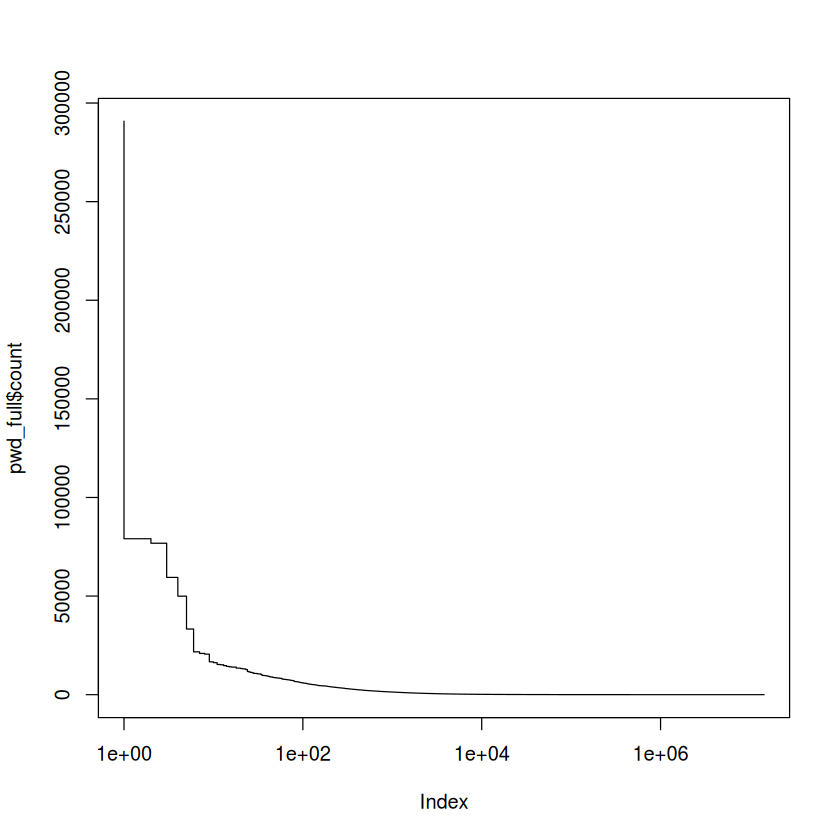

In [5]:
plot(pwd_full$count, log="x", type='S', lwd=1, lend=10)

In [9]:
df_ry_pwd_len[is.na(df_ry_pwd_len)] <- 0

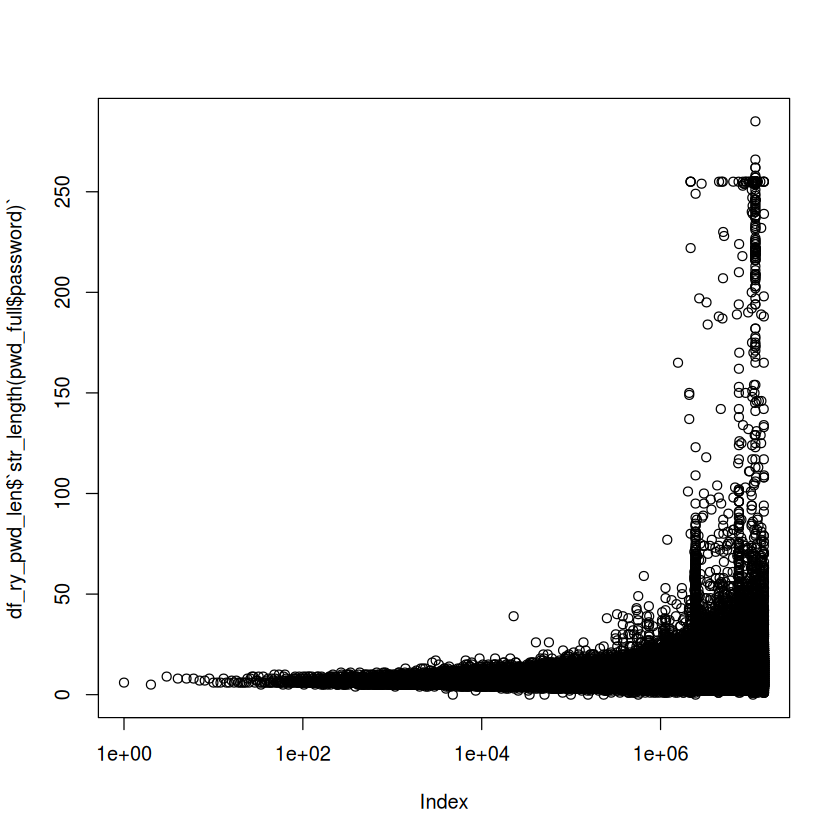

In [13]:
plot(df_ry_pwd_len$`str_length(pwd_full$password)`, log="x") 

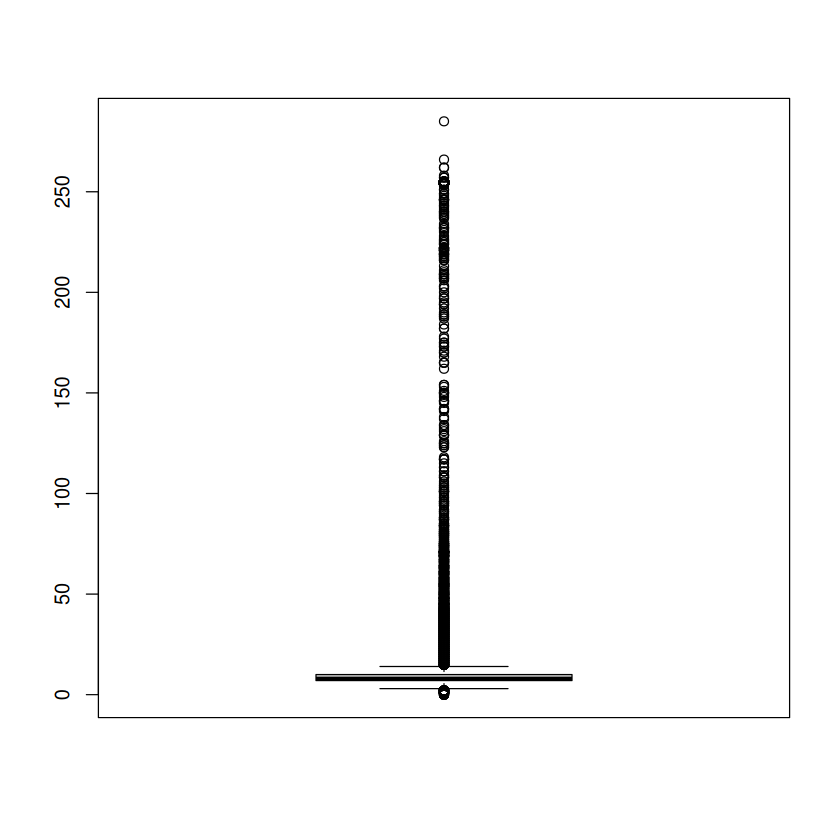

In [62]:
boxplot(df_ry_pwd_len$`str_length(pwd_full$password)`)

**c)**

Take a look at the ten most frequent passwords. Give a password (creation) policy for them. Your policy can be informal or very formal.

The policy of the ten most frequent password $p_{tt}$ can be described in the following way:
$$
    5 \leq |p_{tt}| \leq 9
$$
Passwords can be chosen from are from the English dictionary as well as colloquial phrases (iloveyou, rockyou) and series of numbers (123...) or characters (abc) in ascending order.

In [38]:
head(pwd_full, 10)

count  password 
1  290729 123456   
2   79076 12345    
3   76789 123456789
4   59462 password 
5   49952 iloveyou 
6   33291 princess 
7   21725 1234567  
8   20901 rockyou  
9   20553 12345678 
10  16648 abc123

**d)**

There is no single password policy. Select all passwords which are 7 to 32 characters long, contain at least one digit and at least one upper case letter. We call this set $P_1$.

In several steps the policy can be easily achieved
 
 * get only passwords - can be merged later in R via join
 * slice passwords in range 7-32
 * regular expressions according the $P_1$ policy

```bash
awk -F "\"*,\"*" '{print $2}' rockyou.csv > pure.txt
cat pure.txt | egrep '^.{8,33}$' > pure_len.txt
cat pure_len.txt | awk '/[A-Z]/ && /[0-9]/' > p1.txt
csvjoin -c "password,password" --left p1.txt rockyou.csv > final_p1.csv
```
The original set contain 14,344,388 records whereby the $P_1$ set contains 764563 passwords.

Now we can import these passwords in _R_.

In [39]:
tmp <- read.csv("final_p1.csv")
tmp$count[is.na(tmp$count)] <- 0

In [41]:
p1 <- tmp[order(as.integer(tmp$count), decreasing =T),]

In [63]:
head(p1, 11)

password  count probability 
570405 Password1 449   0.0004836423
570417 PASSWORD1 396   0.0004265531
591899 PRINCESS1 298   0.0003209920
130640 BABYGIRL1 236   0.0002542084
591892 Princess1 225   0.0002423597
593715 P@ssw0rd  218   0.0002348197
593717 P@ssw0rd  218   0.0002348197
392252 JORDAN23  217   0.0002337425
570263 Passw0rd  207   0.0002229710
463153 LOVE123   203   0.0002186623
78581  A123456   175   0.0001885020

**e)**

$P_1$ will no contain all passwords which match to our policy. How do we handle passwords which do not appear but match to our policy? You either extend $P_1$ or not. Give the reasons for your decision.

In [45]:
nrow(pwd_full)
nrow(p1)

[1] 14344388

[1] 764563

So we lost 246 passwords, which are 0.052% and can be neglected.

There also some passwords lost in translation via grepping and awking around, as the contain certain characters or other oddities that we don't want to spend time with. We assume they are neglible as well for the assignment.

**f)**

Calculate the probability of each password in $P_1$.

The probability is simply calculated by using the occurrence (count) divided by the overall occurrence (sum of all counts).

But only for our subset $P_1$

In [46]:
s <- sum(p1$count, na.rm = T)
s

[1] 928372

In [47]:
p1['probability'] <- p1$count / s

In [48]:
head(p1, 10)

password  count probability 
570405 Password1 449   0.0004836423
570417 PASSWORD1 396   0.0004265531
591899 PRINCESS1 298   0.0003209920
130640 BABYGIRL1 236   0.0002542084
591892 Princess1 225   0.0002423597
593715 P@ssw0rd  218   0.0002348197
593717 P@ssw0rd  218   0.0002348197
392252 JORDAN23  217   0.0002337425
570263 Passw0rd  207   0.0002229710
463153 LOVE123   203   0.0002186623

**g)**

Calculate Shannon Entropy of $P_1$.

The Shannon-Entropy (expected value) can be calculated via

$$
    H_1 = - \sum_{i=1}^N Pr[X = x_i] \log_2(Pr[X = x_i])
$$

R has the neat feature of already implementing the calculation for us, as well as computes natively with vectors and matrices.

In [49]:
shannon_ry <- entropy(pwd_full$count, base = 2)
shannon_p1 <- entropy(p1$count, base = 2)
shannon_ry
shannon_p1
entropy(p1$probability, base = 2)

[1] 14.60746

[1] 13.34012

[1] 13.34012

Therefore the Shannon-Entropy of $P_1$ is 13.3401231257215 Bit.

**h)**

Assume an online adversary with unlimited guesses likes to break 200 accounts.

Estimate the expected number of guesses.

We worked with expected number of guesses $G_1$ as in the slides presented:
$$
    G_1(X) = \sum_{i=1}^N i \cdot Pr[X = x_i]
$$
Therefore the exprected number of guesses is
$$
    k \cdot G_1(X)
$$

In [50]:
i <- c(1:nrow(p1))
g_1 <- sum(i*c(p1$probability))
g_1
200 * g_1

[1] 317729.3

[1] 63545857

**i)**

Assume an online adversary likes to break at least 50 of 200 accounts. Estimate
adversary’s work.

We calculated the $\beta$-success rate as presented in the slides:
$$
    \lambda_\beta(X) = \sum_{i=1}^\beta Pr[X = x_i]
$$
We iterate through the vector of probabilities beginning with the highest probability und sum them up until we reach the threshold of $\frac{50}{200} = 0.25$. This can be done in the following way.

We found $\beta = 70202$ by guessing.

In [51]:
sum(c(p1$probability)[1:70202])

[1] 0.25

**j)**

Formalize your own password policy and repeat the above estimations.

Basically we took the rules for $P_1$ and tuned them in some way, as we enforce at least length of ten.
$p \in P_2, |p| \geq 10$
The charecters can be choosen from the alphabet $A = {a-z,A-Z,0-9,@#$%^&+=}$ where at least on upper case, one digit and one special character has to be present.

We have done this via command line likewise to $P_1$.
```bash
grep '[[:punct:]]' pure.txt > own1
cat own1 | awk '/[A-Z]/ && /[0-9]/ > own2
egrep '^.{11,}$' own2 > p2.txt
csvjoin -c "password,password" --left p2.txt rockyou.csv > final_p2.csv
```
We can import these set as same way...

In [53]:
tmp <- read.csv("final_p2.csv")
tmp$count[is.na(tmp$count)] <- 0

In [54]:
p2 <- tmp[order(as.integer(tmp$count), decreasing =T),]
head(p2, 10)

password         count
1  Password1!       14   
2  1941.Salembbb.41 13   
3  Babygirl#1       10   
4  iydgTvm6d;yo      8   
5  BABYGIRL#1        8   
6  #1PRINCESS        8   
7  Baby_Gurl42       7   
8  PRINCESS#1        6   
9  PA$$word11        6   
10 ABCabc123!@#      6

In [56]:
nrow(p2)

[1] 36117

In [57]:
s2 <- sum(p2$count)
p2['probability'] <- p2$count / s2

In [58]:
head(p2, 10)

password         count probability 
1  Password1!       14    0.0003794758
2  1941.Salembbb.41 13    0.0003523704
3  Babygirl#1       10    0.0002710541
4  iydgTvm6d;yo      8    0.0002168433
5  BABYGIRL#1        8    0.0002168433
6  #1PRINCESS        8    0.0002168433
7  Baby_Gurl42       7    0.0001897379
8  PRINCESS#1        6    0.0001626325
9  PA$$word11        6    0.0001626325
10 ABCabc123!@#      6    0.0001626325

In [59]:
entropy(p2$count, base = 2)
entropy(p2$probability, base = 2)

[1] 10.46001

[1] 10.46001

In [60]:
j <- c(1:nrow(p2))
p_2_g_1 <- sum(j*c(p2$probability))
p_2_g_1
200 * p_2_g_1

[1] 17132.79

[1] 3426557

In [61]:
sum(c(p2$probability)[1:7867])

[1] 0.2500203

**k)**

Compare the password policies and estimations.

$P_1$:
 * $H_1(X) = 13.3401231257215$
 * $G_1(X) = 317729.285508395$
 * $k \cdot G_1(X) = 63545857.1016791$
 * $\beta$-success rate: 70202 for 25%

$P_2$:
 * $H_1(X) = 10.4600079594715$
 * $G_1(X) = 17132.7873580354$
 * $k \cdot G_1(X) = 3426557.47160708$
 * $\beta$-success rate: 7867 for 25%

The entropy is reduced by the new rules, as they reduce the possible password set. Therefore the password space drastically decreases and the entropy lowers.

The guesswork is reduced by a factor of 20. Thus the $\beta$-success rate is almost 10 times lower than the original one.

In some way this is counter-intuitive, as we expect to get better entropy values from a more strict password policy.